# <div align="center" style="color: #ff5733;">Customer 360 Data Preparation</div>

Dated: 02-09-2024 <br><br>
By: Dwaipayan Chakroborti

# Declare Libraries

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
pd.set_option('display.max_columns', None)

# End Declare Libraries

# Read the Data from the CSV file customerid_onboarded_1stJan2024

In [2]:
cusonbrd = pd.read_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\Customer_360_Data_Prep\customerid_onboarded_1stJan2024.csv")
cusonbrd.shape

(119, 1)

In [3]:
cusonbrd.head()

,customer_id
0,2355677
1,2355517
2,2355698
3,2355673
4,2355268


In [4]:
a = tuple(cusonbrd['customer_id'])
a[:5]

(2355677, 2355517, 2355698, 2355673, 2355268)

# End Read the Data from the CSV file customerid_onboarded_1stJan2024

# CredoLab Data

In [5]:
sq = f"""
with cusmtb as
(select 
    cust_id     ,
    device_id   ,
    mobile_no   ,
    device_dtl  ,
    kyc_status  ,
    status      ,
    product     ,
from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb 
where cast(cust_id as numeric) in {a}
)
select 
    cusmtb.cust_id ,
    cusmtb.device_id   ,
    cusmtb.mobile_no   ,
    cusmtb.device_dtl  ,
    tlcd.kycStatus      ,
    cusmtb.status      ,
    cusmtb.product     ,
    tlcd.email          ,
    tlcd.signUpAccNo    ,
    tlcd.firstName      ,
    tlcd.middleName     ,
    tlcd.lastName       ,
    tlcd.gender         ,
    tlcd.dateOfBirth    ,
    tlcd.credolabScore  ,
    tlcd.credolabRefNumber  ,
    tlcd.city   ,
    tlcd.province   ,
    tlcd.barangay   ,
    tlcd.country	,
    tlcd.provinceCode	,
    tlcd.postalcode	,
    tlcd.mailingCity	,
    tlcd.mailingPostalCode	,
    tlcd.mailingProvince	    ,
    tlcd.employmentstatus	,
    tlcd.natureofwork    ,
    tlcd.kycStatusChangeDt  ,	
    tlcd.mobileOs   ,
    tlcd.onboardingDate ,
    tlcd.companyName    ,
    tlcd.updatedCompanyName ,
    tlcd.industry   ,
    t3.creditScoreUpdated   ,
    t3.fraudScore   ,	
    t3.fraudScoreUpdated    ,
    t3.calculateddate   ,
    t4.run_date ,
    ca.package_name ,
    ca.first_install_time    ,
    t4.GeneralInfo.brand     ,
    t4.Hardware.device__brand   ,
    t4.Hardware.device__manufacturer   ,
    t4.Hardware.device__model,
    t4.GeneralData.telephony_info__network_operator_name,
    t4.GeneralData.telephony_info__network_operator,
    t4.GeneralData.sim_operator_name,
from cusmtb
inner join prj-prod-dataplatform.dl_loans_db_raw.tdbk_loan_customer_details tlcd on tlcd.custId = cusmtb.cust_id  
inner JOIN `prj-prod-dataplatform.dl_loans_db_raw.tdbk_credolab_track` t3 ON cast(tlcd.credolabRefNumber as string) = cast(t3.refno as string)
left JOIN `prj-prod-dataplatform.credolab_raw.android_credolab_datasets_struct_columns` t4 ON t3.refno = t4.deviceId
 INNER JOIN
(select deviceId, af.package_name as package_name, af.first_install_time as first_install_time from `prj-prod-dataplatform.credolab_raw.android_credolab_Application`  ,
unnest(Application) as af) ca
ON ca.deviceId = t3.refno
;



"""

cusmtb = client.query(sq).to_dataframe()
cusmtb.columns.values

array(['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName',
       'middleName', 'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated',
       'fraudScore', 'fraudScoreUpdated', 'calculateddate', 'run_date',
       'package_name', 'first_install_time', 'brand', 'device__brand',
       'device__manufacturer', 'device__model',
       'telephony_info__network_operator_name',
       'telephony_info__network_operator', 'sim_operator_name'],
      dtype=object)

In [6]:
cusmtb.head()

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,run_date,package_name,first_install_time,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name,telephony_info__network_operator,sim_operator_name
0,2355488,8e4abde7bf40472a8c6635d2fde0621900U3oWA2,639553823527,ANDROID-8.1.0,SKYC,A,TSAE1.0,cristobalmaryann95@gmail.com,60823554880007,DENNIS,HERRERA,CRISTOBAL,M,13 Jul 1984,452,1f950ea9-ae01-4ddd-8834-b73d866c273f,ANGAT,Bulacan,BINAGBAG,PHL,None,3012,None,None,None,1,41,None,Android,2024-01-01 08:16:40.000000,None,None,16,None,811.0,None,2024-01-01T08:12:39.7183336,2024-01-01,com.coloros.backuprestore,2019-08-27 01:30:18+00:00,OPPO,OPPO,None,CPH1909,TM,51502,TM
1,2355488,8e4abde7bf40472a8c6635d2fde0621900U3oWA2,639553823527,ANDROID-8.1.0,SKYC,A,TSAE1.0,cristobalmaryann95@gmail.com,60823554880007,DENNIS,HERRERA,CRISTOBAL,M,13 Jul 1984,452,1f950ea9-ae01-4ddd-8834-b73d866c273f,ANGAT,Bulacan,BINAGBAG,PHL,None,3012,None,None,None,1,41,None,Android,2024-01-01 08:16:40.000000,None,None,16,None,811.0,None,2024-01-01T08:12:39.7183336,2024-01-01,com.android.fmradio,2019-08-27 01:30:18+00:00,OPPO,OPPO,None,CPH1909,TM,51502,TM
2,2355488,8e4abde7bf40472a8c6635d2fde0621900U3oWA2,639553823527,ANDROID-8.1.0,SKYC,A,TSAE1.0,cristobalmaryann95@gmail.com,60823554880007,DENNIS,HERRERA,CRISTOBAL,M,13 Jul 1984,452,1f950ea9-ae01-4ddd-8834-b73d866c273f,ANGAT,Bulacan,BINAGBAG,PHL,None,3012,None,None,None,1,41,None,Android,2024-01-01 08:16:40.000000,None,None,16,None,811.0,None,2024-01-01T08:12:39.7183336,2024-01-01,com.mediatek.gba,2019-08-27 01:30:18+00:00,OPPO,OPPO,None,CPH1909,TM,51502,TM
3,2355488,8e4abde7bf40472a8c6635d2fde0621900U3oWA2,639553823527,ANDROID-8.1.0,SKYC,A,TSAE1.0,cristobalmaryann95@gmail.com,60823554880007,DENNIS,HERRERA,CRISTOBAL,M,13 Jul 1984,452,1f950ea9-ae01-4ddd-8834-b73d866c273f,ANGAT,Bulacan,BINAGBAG,PHL,None,3012,None,None,None,1,41,None,Android,2024-01-01 08:16:40.000000,None,None,16,None,811.0,None,2024-01-01T08:12:39.7183336,2024-01-01,com.mediatek.ims,2019-08-27 01:30:18+00:00,OPPO,OPPO,None,CPH1909,TM,51502,TM
4,2355488,8e4abde7bf40472a8c6635d2fde0621900U3oWA2,639553823527,ANDROID-8.1.0,SKYC,A,TSAE1.0,cristobalmaryann95@gmail.com,60823554880007,DENNIS,HERRERA,CRISTOBAL,M,13 Jul 1984,452,1f950ea9-ae01-4ddd-8834-b73d866c273f,ANGAT,Bulacan,BINAGBAG,PHL,None,3012,None,None,None,1,41,None,Android,2024-01-01 08:16:40.000000,None,None,16,None,811.0,None,2024-01-01T08:12:39.7183336,2024-01-01,com.factory.mmigroup,2019-08-27 01:30:18+00:00,OPPO,OPPO,None,CPH1909,TM,51502,TM


In [7]:
cusmtb.shape

(17132, 47)

In [8]:
# group by cust_id and calculate the required counts
result_df = cusmtb.groupby('cust_id').agg({
    'device_id': 'nunique',
    'mobile_no': 'nunique'
}).reset_index()

# add cust_id count
result_df['cust_id_count'] = result_df['device_id'].map(cusmtb['device_id'].value_counts())

# rename the columns for better readability
result_df = result_df.rename(columns={
    'device_id': 'unique_device_id_count',
    'mobile_no': 'unique_mobile_no_count'
})



In [9]:
if len(result_df[result_df['unique_device_id_count'] > 1]) > 0:
    print("More than one device id associated with customer id")
else:
    print("Only one device id is associated with customer id")

Only one device id is associated with customer id


In [10]:
if len(result_df[result_df['unique_mobile_no_count'] > 1]) > 0:
    print("More than one mobile number associated with customer id")
else:
    print("Only one mobile number is associated with customer id")

Only one mobile number is associated with customer id


In [11]:
dfapp = pd.read_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\Customer_360_Data_Prep\PH_TonikBank_applications_20240807.csv")

In [12]:
dfapp.head()

,Package Name,# of datasets,# of datasets where app is considered as user installed,Category,Rating,Rating Description,Is Paid
0,com.tonik.mobile,685556,685553,finance,rated for 3+,undefined,free
1,android,684929,0,NaN,NaN,NaN,NaN
2,com.android.providers.settings,684922,0,NaN,NaN,NaN,NaN
3,com.android.externalstorage,684920,0,NaN,NaN,NaN,NaN
4,com.android.settings,684920,0,NaN,NaN,NaN,NaN


In [13]:
dfapp['Category'].unique()

array(['finance', nan, 'tools', 'business', 'communication',
       'video players & editors', 'travel & local', 'social',
       'productivity', 'photography', 'auto & vehicles', 'shopping',
       'music & audio', 'entertainment', 'action', 'news & magazines',
       'food & drink', 'lifestyle', 'personalization', 'art & design',
       'maps & navigation', 'adventure', 'weather', 'health & fitness',
       'casual', 'education', 'sports', 'strategy', 'casino', 'puzzle',
       'books & reference', 'word', 'arcade', 'educational', 'medical',
       'card', 'role playing', 'dating', 'comics', 'board', 'music',
       'simulation', 'racing', 'trivia', 'parenting', 'events', 'beauty',
       'house & home', 'libraries & demo', 'undefined'], dtype=object)

In [14]:
import re

def categorize_package(package_name):
    if isinstance(package_name, str):
        pattern = r'linkedin|jobstreet|glint'
        if re.search(pattern, package_name, re.IGNORECASE):
            return 'Job'
        pattern1 = r'office|gdrive|word|powerpoint|excel|'
        if re.search(pattern, package_name, re.IGNORECASE):
            return 'Professional'
    return 'Other'

dfapp['CustomCategory'] = dfapp['Package Name'].apply(categorize_package)
dfapp.head()

,Package Name,# of datasets,# of datasets where app is considered as user installed,Category,Rating,Rating Description,Is Paid,CustomCategory
0,com.tonik.mobile,685556,685553,finance,rated for 3+,undefined,free,Other
1,android,684929,0,NaN,NaN,NaN,NaN,Other
2,com.android.providers.settings,684922,0,NaN,NaN,NaN,NaN,Other
3,com.android.externalstorage,684920,0,NaN,NaN,NaN,NaN,Other
4,com.android.settings,684920,0,NaN,NaN,NaN,NaN,Other


In [15]:
dfapp['CombinedCategory'] = np.where((dfapp['CustomCategory'].notna()) & (dfapp['CustomCategory'] != 'Other'),
                                     dfapp['CustomCategory'],
                                     dfapp['Category'])

In [16]:
dfapp.drop(columns=['Category', 'CustomCategory'], inplace=True)
dfapp.rename(columns={'CombinedCategory':'Category'}, inplace = True)
dfapp.head()

,Package Name,# of datasets,# of datasets where app is considered as user installed,Rating,Rating Description,Is Paid,Category
0,com.tonik.mobile,685556,685553,rated for 3+,undefined,free,finance
1,android,684929,0,NaN,NaN,NaN,NaN
2,com.android.providers.settings,684922,0,NaN,NaN,NaN,NaN
3,com.android.externalstorage,684920,0,NaN,NaN,NaN,NaN
4,com.android.settings,684920,0,NaN,NaN,NaN,NaN


In [17]:
# For df_risk_table_2
cusmtb['package'] = cusmtb['package_name'].str.replace(r'[ ._]', '', regex=True)

# For dfapp
dfapp['package'] = dfapp['Package Name'].str.replace(r'[ ._]', '', regex=True)


In [18]:
Credodata = cusmtb.merge(dfapp, on='package', how = 'outer')

In [19]:
Credodata.head()

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,run_date,package_name,first_install_time,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name,telephony_info__network_operator,sim_operator_name,package,Package Name,# of datasets,# of datasets where app is considered as user installed,Rating,Rating Description,Is Paid,Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACENAPK,ACEN.APK,1,1,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AO3ArchiveofOurOwnhwawi,AO3.Archive_of_Our_Own_hwawi,1,1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARRulerBirdmanStudionet,ARRuler.BirdmanStudio.net,3,3,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AirLite,Air.Lite,4,4,rated for 3+,undefined,free,productivity
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AlfasoftWidgetsPsychedelicAnalogClock,Alfasoft.Widgets.PsychedelicAnalogClock,5,5,rated for 3+,undefined,free,personalization


In [20]:
Credodata.groupby('Category')['cust_id'].nunique().sort_values(ascending = False)

Category
communication              61
business                   61
video players & editors    61
productivity               61
travel & local             61
tools                      61
photography                61
social                     61
finance                    61
auto & vehicles            58
music & audio              58
shopping                   58
entertainment              56
lifestyle                  32
news & magazines           32
casual                     31
health & fitness           30
personalization            29
maps & navigation          28
action                     27
Job                        25
food & drink               25
books & reference          19
puzzle                     18
arcade                     18
education                  17
adventure                  16
simulation                 16
art & design               14
sports                     13
word                       12
card                       11
casino                     10
s

In [21]:
Credodata.groupby(['Rating Description', 'Rating'])['cust_id'].nunique().sort_values(ascending = False)

Rating Description                                                                                                             Rating       
parental guidance recommended                                                                                                  rated for 12+    61
undefined                                                                                                                      rated for 3+     61
                                                                                                                               rated for 18+    39
moderate violence                                                                                                              rated for 12+    26
simulated gambling                                                                                                             rated for 12+    15
                                                                                                                            

In [22]:
Credodata.columns

Index(['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'run_date', 'package_name',
       'first_install_time', 'brand', 'device__brand', 'device__manufacturer',
       'device__model', 'telephony_info__network_operator_name',
       'telephony_info__network_operator', 'sim_operator_name', 'package',
       'Package Name', '# of datasets',
       '# of datasets where app is considered as user installed', 'Rating',
       'Rating Descripti

In [23]:
Credodata = Credodata[['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'run_date', 'package_name', 'first_install_time','brand', 'device__brand', 'device__manufacturer',
       'device__model', 'telephony_info__network_operator_name' ,'package', 'Category', 'Rating', 'Rating Description', 'Is Paid']].copy()

In [24]:
Credodata['Category'] = Credodata['Category'].fillna('Others')

In [25]:
Credodata[Credodata['cust_id'].isnull() == True]

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,run_date,package_name,first_install_time,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name,package,Category,Rating,Rating Description,Is Paid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,ACENAPK,Others,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AO3ArchiveofOurOwnhwawi,Others,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,ARRulerBirdmanStudionet,Others,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AirLite,productivity,rated for 3+,undefined,free
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,AlfasoftWidgetsPsychedelicAnalogClock,personalization,rated for 3+,undefined,free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,zyxxyballbox,Others,NaN,NaN,NaN
383345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,zzhsegegegee,Others,NaN,NaN,NaN
383346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,zzmdgclelectroniccigarette,tools,rated for 3+,undefined,free
383347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,zzxpwyyydqoyhuceyya,Others,NaN,NaN,NaN


In [26]:
Credodata = Credodata.dropna(subset=['cust_id'])

In [27]:
Credodata.shape

(17150, 50)

In [28]:
# Find all rows with duplicates (including the first occurrence)
all_duplicate_rows = Credodata[Credodata.duplicated(keep=False)]

# Display all duplicate rows
all_duplicate_rows.head()

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,run_date,package_name,first_install_time,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name,package,Category,Rating,Rating Description,Is Paid
27337,2355259,3a7d82dda5914f36a3766aa5a1886f68ftpxYkCe,639354163853,ANDROID-13,SKYC,A,TSA1.0,anneveluz05@gmail.com,60823552590006,MERY ANN,VELUZ,BULAONG,F,05 Jan 1983,522,899e5bc8-12ec-4770-87e2-0b079e1f6e4b,MALOLOS,Bulacan,SANTOL,PHL,None,3000,None,None,None,1,24,None,Android,2024-01-01 02:59:49.000000,None,None,13,None,944.0,None,2024-01-01T02:54:05.46886,2024-01-01,com.android.bluetooth.overlay,2009-01-01 08:00:00+00:00,Redmi,Redmi,None,22101316UG,TM,comandroidbluetoothoverlay,Others,NaN,NaN,NaN
27338,2355259,3a7d82dda5914f36a3766aa5a1886f68ftpxYkCe,639354163853,ANDROID-13,SKYC,A,TSA1.0,anneveluz05@gmail.com,60823552590006,MERY ANN,VELUZ,BULAONG,F,05 Jan 1983,522,899e5bc8-12ec-4770-87e2-0b079e1f6e4b,MALOLOS,Bulacan,SANTOL,PHL,None,3000,None,None,None,1,24,None,Android,2024-01-01 02:59:49.000000,None,None,13,None,944.0,None,2024-01-01T02:54:05.46886,2024-01-01,com.android.bluetooth.overlay,2009-01-01 08:00:00+00:00,Redmi,Redmi,None,22101316UG,TM,comandroidbluetoothoverlay,Others,NaN,NaN,NaN
27339,2355395,dc7382d6037c47368f41383316e7e362juflCP59,639158407490,ANDROID-14,SKYC,A,LOAN1.0,ymymymb@gmail.com,60823553950003,MARVIN,PAPELLERAS,BULING,M,06 May 1983,501,07a45e4d-b1fc-4d00-89b1-44268139f945,CITY OF VALENZUELA,METRO MANILA,MAPULANG LUPA,PHL,None,1448,None,None,None,1,9,None,Android,2024-01-01 06:08:10.000000,None,None,20,None,944.0,None,2024-01-01T06:01:12.170808,2024-01-01,com.android.bluetooth.overlay,2009-01-01 08:00:00+00:00,Xiaomi,Xiaomi,None,21081111RG,GLOBE,comandroidbluetoothoverlay,Others,NaN,NaN,NaN
27340,2355395,dc7382d6037c47368f41383316e7e362juflCP59,639158407490,ANDROID-14,SKYC,A,LOAN1.0,ymymymb@gmail.com,60823553950003,MARVIN,PAPELLERAS,BULING,M,06 May 1983,501,07a45e4d-b1fc-4d00-89b1-44268139f945,CITY OF VALENZUELA,METRO MANILA,MAPULANG LUPA,PHL,None,1448,None,None,None,1,9,None,Android,2024-01-01 06:08:10.000000,None,None,20,None,944.0,None,2024-01-01T06:01:12.170808,2024-01-01,com.android.bluetooth.overlay,2009-01-01 08:00:00+00:00,Xiaomi,Xiaomi,None,21081111RG,GLOBE,comandroidbluetoothoverlay,Others,NaN,NaN,NaN
27341,2355521,82e6f0131f684ded8bd99e6426b8625b5y2eOA4b,639947986128,ANDROID-13,SKYC,A,LOAN1.0,alingcarminam@gmail.com,60823555210001,CARMINA,MARTIN,ALING,F,12 Oct 1999,494,d053833d-0690-43c9-8c9c-07433eddd9ab,SAN JOSE DEL MONTE,Bulacan,MUZON,PHL,None,3023,None,None,None,1,28,None,Android,2024-01-01 08:51:53.000000,None,None,2,None,824.0,None,2024-01-01T08:49:14.4530404,2024-01-01,com.android.bluetooth.overlay,2009-01-01 08:00:00+00:00,Redmi,Redmi,None,23021RAAEG,DITO,comandroidbluetoothoverlay,Others,NaN,NaN,NaN


# Device Purchased Date

In [29]:
dfpurchase = Credodata[Credodata['Category']=='Others'].groupby('cust_id')['first_install_time'].min().reset_index()
dfpurchase.rename(columns={'first_install_time':'Device_Purhcase_Date'}, inplace = True)
dfpurchase.head()

,cust_id,Device_Purhcase_Date
0,2355229,1970-01-01 08:00:00+00:00
1,2355259,1970-01-01 08:00:00+00:00
2,2355274,2018-08-09 01:51:49+00:00
3,2355281,1970-01-01 08:00:00+00:00
4,2355294,1970-01-01 08:00:00+00:00


In [30]:
len(Credodata['Category'].unique())

46

In [31]:
dfapp1 = Credodata.pivot_table(index = 'cust_id', columns='Category', values='package', aggfunc='nunique').reset_index()
dfapp1.head()

Category,cust_id,Job,Others,action,adventure,arcade,art & design,auto & vehicles,beauty,board,books & reference,business,card,casino,casual,comics,communication,dating,education,educational,entertainment,finance,food & drink,health & fitness,lifestyle,maps & navigation,medical,music,music & audio,news & magazines,personalization,photography,productivity,puzzle,racing,role playing,shopping,simulation,social,sports,strategy,tools,travel & local,trivia,video players & editors,weather,word
0,2355229,1.0,168.0,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,2.0,23.0,2.0,2.0,1.0,2.0,NaN,NaN,2.0,1.0,NaN,5.0,6.0,1.0,1.0,NaN,4.0,NaN,3.0,4.0,1.0,20.0,3.0,NaN,5.0,NaN,NaN
1,2355259,NaN,230.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,7.0,1.0,NaN,NaN,1.0,20.0,7.0,2.0,1.0,NaN,NaN,NaN,3.0,NaN,1.0,7.0,11.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,25.0,3.0,NaN,3.0,1.0,NaN
2,2355274,NaN,270.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,7.0,NaN,1.0,NaN,NaN,8.0,NaN,2.0,NaN,1.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,8.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,15.0,1.0,NaN,3.0,NaN,NaN
3,2355281,1.0,194.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,24.0,NaN,5.0,2.0,NaN,NaN,NaN,2.0,1.0,1.0,5.0,5.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,22.0,4.0,NaN,4.0,NaN,NaN
4,2355294,NaN,154.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,15.0,1.0,NaN,4.0,NaN,NaN


In [32]:
dfapp1 = dfapp1.fillna(0.0)

In [33]:
dfapp1.columns

Index(['cust_id', 'Job', 'Others', 'action', 'adventure', 'arcade',
       'art & design', 'auto & vehicles', 'beauty', 'board',
       'books & reference', 'business', 'card', 'casino', 'casual', 'comics',
       'communication', 'dating', 'education', 'educational', 'entertainment',
       'finance', 'food & drink', 'health & fitness', 'lifestyle',
       'maps & navigation', 'medical', 'music', 'music & audio',
       'news & magazines', 'personalization', 'photography', 'productivity',
       'puzzle', 'racing', 'role playing', 'shopping', 'simulation', 'social',
       'sports', 'strategy', 'tools', 'travel & local', 'trivia',
       'video players & editors', 'weather', 'word'],
      dtype='object', name='Category')

In [34]:
dfapp1 = dfapp1[['cust_id', 'Others', 'action', 'adventure', 'arcade', 'art & design',
       'auto & vehicles', 'beauty', 'board', 'books & reference', 'business',
       'card', 'casino', 'casual', 'comics', 'communication', 'dating',
       'education', 'educational', 'entertainment', 'finance', 'food & drink',
       'health & fitness', 'lifestyle', 'maps & navigation', 'medical',
       'music', 'music & audio', 'news & magazines', 'personalization',
       'photography', 'productivity', 'puzzle', 'racing', 'role playing',
       'shopping', 'simulation', 'social', 'sports', 'strategy', 'tools',
       'travel & local', 'trivia', 'video players & editors', 'weather',
       'word']].copy()

In [35]:
dfrating = Credodata.pivot_table(index = 'cust_id', columns='Rating', values='package', aggfunc='nunique').reset_index()
dfrating.head()

Rating,cust_id,rated for 12+,rated for 16+,rated for 18+,rated for 3+,rated for 7+
0,2355229,18.0,1.0,3.0,84.0,5.0
1,2355259,13.0,NaN,3.0,91.0,NaN
2,2355274,15.0,1.0,1.0,54.0,NaN
3,2355281,15.0,NaN,2.0,82.0,NaN
4,2355294,8.0,NaN,NaN,35.0,NaN


In [36]:
dfrating1 = dfrating[['cust_id', 'rated for 12+', 'rated for 16+', 'rated for 18+']].copy()

In [37]:
dfrating1.head()

Rating,cust_id,rated for 12+,rated for 16+,rated for 18+
0,2355229,18.0,1.0,3.0
1,2355259,13.0,NaN,3.0
2,2355274,15.0,1.0,1.0
3,2355281,15.0,NaN,2.0
4,2355294,8.0,NaN,NaN


In [38]:
dfpaid = Credodata.pivot_table(index = 'cust_id', columns='Is Paid', values='package', aggfunc='nunique').reset_index()
dfpaid = dfpaid.fillna(0)


In [39]:
Credodata.columns

Index(['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'run_date', 'package_name',
       'first_install_time', 'brand', 'device__brand', 'device__manufacturer',
       'device__model', 'telephony_info__network_operator_name', 'package',
       'Category', 'Rating', 'Rating Description', 'Is Paid'],
      dtype='object')

In [40]:
tab1 = Credodata[['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'onboardingDate', 'companyName','industry','fraudScore', 'brand', 'device__brand', 'device__manufacturer',
       'device__model', 'telephony_info__network_operator_name']].copy()

In [41]:
tab1_deduped = tab1.drop_duplicates(keep='first')

In [42]:
duplicate_ids = tab1_deduped[tab1_deduped['cust_id'].duplicated()]['cust_id']

In [43]:
tab1_deduped[tab1_deduped['cust_id']=='2355501']

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,onboardingDate,companyName,industry,fraudScore,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name
392,2355501,c95c56cf7f04417fb9f7c47831d9ccceHohKSAUK,639565522893,ANDROID-12,SKYC,A,TSAE1.0,insonroy123@gmail.com,60823555010007,ROY,None,INSON,M,27 Sep 1997,532,1e6e88f7-d433-47c1-86d7-87ce21e21add,CITY OF CALOOCAN,METRO MANILA,BARANGAY 177,PHL,None,1400,None,None,None,1,40,None,ANDROID,2024-01-01 08:27:04.000000,TARSIER SECURITY AGENCY,None,25,Y,944.0,Y,2024-08-12T01:20:25.4399824,2024-01-01 08:27:04.000000,TARSIER SECURITY AGENCY,25,944.0,TECNO,TECNO,None,TECNO KI5k,GLOBE


In [44]:
duplicate_ids

Series([], Name: cust_id, dtype: object)

In [45]:
tab1_deduped = tab1_deduped.merge(dfapp1, on='cust_id', how = 'left')
tab1_deduped = tab1_deduped.merge(dfrating1, on='cust_id', how = 'left')
tab1_deduped = tab1_deduped.merge(dfpaid, on='cust_id', how = 'left')
tab1_deduped = tab1_deduped.merge(dfpurchase, on='cust_id', how ='left')


In [46]:
tab1_deduped.columns

Index(['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'onboardingDate', 'companyName',
       'industry', 'fraudScore', 'brand', 'device__brand',
       'device__manufacturer', 'device__model',
       'telephony_info__network_operator_name', 'Others', 'action',
       'adventure', 'arcade', 'art & design', 'auto & vehicles', 'beauty',
       'board', 'books & reference', 'business', 'card', 'casino', 'casual',
       'comics', 'communica

In [47]:
tab1_deduped.head()

,cust_id,device_id,mobile_no,device_dtl,kycStatus,status,product,email,signUpAccNo,firstName,middleName,lastName,gender,dateOfBirth,credolabScore,credolabRefNumber,city,province,barangay,country,provinceCode,postalcode,mailingCity,mailingPostalCode,mailingProvince,employmentstatus,natureofwork,kycStatusChangeDt,mobileOs,onboardingDate,companyName,updatedCompanyName,industry,creditScoreUpdated,fraudScore,fraudScoreUpdated,calculateddate,onboardingDate,companyName,industry,fraudScore,brand,device__brand,device__manufacturer,device__model,telephony_info__network_operator_name,Others,action,adventure,arcade,art & design,auto & vehicles,beauty,board,books & reference,business,card,casino,casual,comics,communication,dating,education,educational,entertainment,finance,food & drink,health & fitness,lifestyle,maps & navigation,medical,music,music & audio,news & magazines,personalization,photography,productivity,puzzle,racing,role playing,shopping,simulation,social,sports,strategy,tools,travel & local,trivia,video players & editors,weather,word,rated for 12+,rated for 16+,rated for 18+,free,pay,undefined,Device_Purhcase_Date
0,2355501,c95c56cf7f04417fb9f7c47831d9ccceHohKSAUK,639565522893,ANDROID-12,SKYC,A,TSAE1.0,insonroy123@gmail.com,60823555010007,ROY,None,INSON,M,27 Sep 1997,532,1e6e88f7-d433-47c1-86d7-87ce21e21add,CITY OF CALOOCAN,METRO MANILA,BARANGAY 177,PHL,None,1400,None,None,None,1,40,None,ANDROID,2024-01-01 08:27:04.000000,TARSIER SECURITY AGENCY,None,25,Y,944.0,Y,2024-08-12T01:20:25.4399824,2024-01-01 08:27:04.000000,TARSIER SECURITY AGENCY,25,944.0,TECNO,TECNO,None,TECNO KI5k,GLOBE,174.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0,1.0,0.0,6.0,0.0,12.0,0.0,2.0,0.0,5.0,16.0,7.0,2.0,3.0,6.0,0.0,1.0,3.0,0.0,1.0,4.0,11.0,1.0,1.0,0.0,9.0,1.0,4.0,1.0,1.0,22.0,4.0,0.0,7.0,0.0,1.0,23.0,2.0,3.0,147.0,0.0,0.0,1970-01-01 08:00:00+00:00
1,2355677,69995da2835248209911cf4428726f4f3MQaR9s2,639454921643,ANDROID-10,SKYC,A,TSAE1.0,jojieringel@gmail.com,60823556770001,JOJIE,CUBILLAS,RINGEL,F,28 Dec 1981,480,05d05176-5b46-4ca2-9100-fa043ea8e8e3,BUTUAN CITY,Agusan del Norte,AMPAYON,PHL,None,8600,CITY OF PASIG,1600,METRO MANILA,1,28,None,Android,2024-01-01 13:41:54.000000,"National Economic & Development Authority""",None,2,None,944.0,None,2024-01-01T13:35:08.455184,2024-01-01 13:41:54.000000,"National Economic & Development Authority""",2,944.0,vivo,vivo,None,vivo 1910,GLOBE,240.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,8.0,0.0,0.0,1.0,0.0,10.0,1.0,2.0,0.0,6.0,20.0,1.0,0.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,3.0,2.0,6.0,0.0,0.0,12.0,2.0,0.0,4.0,0.0,0.0,26.0,3.0,1.0,104.0,0.0,1.0,2009-01-01 00:00:00+00:00
2,2355772,640df8101828434f886f740519305f1bIKuEv3oz,639560614570,ANDROID-14,SKYC,A,TSAE1.0,trentados02@gmail.com,60823557720008,MYLENE,PADILLA,CANONEO,F,02 Sep 1988,466,5324812a-0060-4622-a52a-678f5d1d499b,CABATUAN,Iloilo,PAMURINGAO PROPER,PHL,None,5031,None,None,None,1,6,None,ANDROID,2024-01-01 21:20:09.000000,Concentrix,None,8,Y,944.0,Y,2024-06-09T01:03:00.184849,2024-01-01 21:20:09.000000,Concentrix,8,944.0,samsung,samsung,None,SM-A556E,GLOBE,323.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,2.0,11.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,16.0,2.0,0.0,4.0,0.0,0.0,14.0,NaN,1.0,76.0,0.0,0.0,1970-01-01 08:00:00+00:00
3,2355369,9b9895a37f564fc3b0fd6e6271d98c77SHJcBsN3,639275712231,ANDROID-13,SKYC,A,TSAE1.0,johnkennethmarcos@yahoo.com,60823553690001,JOHN KENNETH,BACON,MARCOS,M,13 Aug 1989,471,aa14f528-b6b3-4bd8-aa12-1eb082104eb9,TAYTAY,Rizal,SAN JUAN,PHL,None,1920,None,None,None,1,6,None,ANDROID,2024-01-01 05:38:09.000000,Telephilippines incorporated,None,8,Y,944.0,Y,2024-06-04T07:54:20.7555869,2024-01-01 05:38:09.000000,Telephilippines incorporated,8,944.0,realme,realme,None,RMX3085,GLOBE,207.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,20.0,1.0,0.0,1.0,1.0,0.0,11.0,1.0,1.0,65.0,1.0,0.

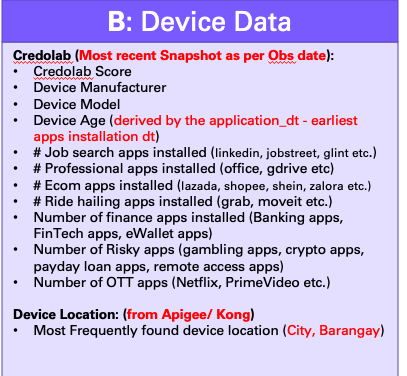

1.  Credolab Score - Done
2.  Device Manufacturer - Brand - Done
3.  Device Model - Done
4.  Device Age - Changed To Device Purchase Date - Done
5.  Apps - Done
6.  Ratings - Done
7.  Paid Flag - Done


In [48]:
df = tab1_deduped[['cust_id', 'device_id', 'mobile_no', 'device_dtl', 'kycStatus',
       'status', 'product', 'email', 'signUpAccNo', 'firstName', 'middleName',
       'lastName', 'gender', 'dateOfBirth', 'credolabScore',
       'credolabRefNumber', 'city', 'province', 'barangay', 'country',
       'provinceCode', 'postalcode', 'mailingCity', 'mailingPostalCode',
       'mailingProvince', 'employmentstatus', 'natureofwork',
       'kycStatusChangeDt', 'mobileOs', 'onboardingDate', 'companyName',
       'updatedCompanyName', 'industry', 'creditScoreUpdated', 'fraudScore',
       'fraudScoreUpdated', 'calculateddate', 'onboardingDate', 'companyName',
       'industry', 'fraudScore', 'brand', 'device__brand',
       'device__manufacturer', 'device__model',
       'telephony_info__network_operator_name', 'Others', 'action',
       'adventure', 'arcade', 'art & design', 'auto & vehicles', 'beauty',
       'board', 'books & reference', 'business', 'card', 'casino', 'casual',
       'comics', 'communication', 'dating', 'education', 'educational',
       'entertainment', 'finance', 'food & drink', 'health & fitness',
       'lifestyle', 'maps & navigation', 'medical', 'music', 'music & audio',
       'news & magazines', 'personalization', 'photography', 'productivity',
       'puzzle', 'racing', 'role playing', 'shopping', 'simulation', 'social',
       'sports', 'strategy', 'tools', 'travel & local', 'trivia',
       'video players & editors', 'weather', 'word', 'rated for 12+',
       'rated for 16+', 'rated for 18+', 'pay', 'Device_Purhcase_Date']].copy()

In [49]:
df['DataSet'] = 'CredoLab Data'

In [50]:
df.to_csv(r"CredolabData_20240903.csv", index = False)